In [131]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
from tqdm import tqdm
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [132]:
import joblib

In [133]:
X_train = joblib.load('X_train.pkl')
Y_train = joblib.load('Y_train.pkl')

In [134]:
for i in range(len(Y_train)):
    if(Y_train[i] == 2):
        Y_train[i] = 1

In [135]:
X_test = joblib.load('X_test.pkl')
Y_test = joblib.load('Y_test.pkl')

In [136]:
for i in range(len(Y_test)):
    if(Y_test[i] == 2):
        Y_test[i] = 1

In [137]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [138]:
X_test_scaled = scaler.transform(X_test)

In [139]:
models = {
    "MLPClassifier": MLPClassifier(max_iter=500, random_state=42),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "SVC": SVC(probability=True, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=500, random_state=42),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "AdaBoostClassifier": AdaBoostClassifier(random_state=42),
    "GaussianNB": GaussianNB(),
    "Voting": VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=500, random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42)),
    ],
    voting='soft'  # 'hard' for majority voting, 'soft' for weighted probabilities
)
}

# Train and evaluate each model
for name, model in tqdm(models.items()):
    model.fit(X_train_scaled, Y_train)
    # y_pred = model.predict(X_test_scaled)
    # accuracy = accuracy_score(Y_test, y_pred)
    # print(f"{name}: Accuracy = {accuracy:.2f}")

 67%|██████▋   | 6/9 [00:16<00:06,  2.06s/it]/home/pranit/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
100%|██████████| 9/9 [00:23<00:00,  2.59s/it]


In [20]:
joblib.dump(models, 'models.pkl')

['models.pkl']

In [31]:
import numpy as np

In [48]:
np.unique(np.array(Y_train))

array([0, 1])

In [142]:
for name, model in tqdm(models.items()):
    # model.fit(X_train_scaled, Y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy:.2f}")
    print(f"{name}: Precision = {precision:.2f}")
    print(f"{name}: Recall = {recall:.2f}")
    print(f"{name}: f1 = {f1:.2f}")

 22%|██▏       | 2/9 [00:00<00:00, 14.69it/s]

MLPClassifier: Accuracy = 0.82
MLPClassifier: Precision = 0.86
MLPClassifier: Recall = 0.81
MLPClassifier: f1 = 0.84
KNeighborsClassifier: Accuracy = 0.78
KNeighborsClassifier: Precision = 0.84
KNeighborsClassifier: Recall = 0.77
KNeighborsClassifier: f1 = 0.80


 78%|███████▊  | 7/9 [00:00<00:00, 13.41it/s]

SVC: Accuracy = 0.84
SVC: Precision = 0.89
SVC: Recall = 0.82
SVC: f1 = 0.86
LogisticRegression: Accuracy = 0.80
LogisticRegression: Precision = 0.84
LogisticRegression: Recall = 0.80
LogisticRegression: f1 = 0.82
DecisionTreeClassifier: Accuracy = 0.69
DecisionTreeClassifier: Precision = 0.76
DecisionTreeClassifier: Recall = 0.68
DecisionTreeClassifier: f1 = 0.72
RandomForestClassifier: Accuracy = 0.82
RandomForestClassifier: Precision = 0.88
RandomForestClassifier: Recall = 0.80
RandomForestClassifier: f1 = 0.84
AdaBoostClassifier: Accuracy = 0.78
AdaBoostClassifier: Precision = 0.82
AdaBoostClassifier: Recall = 0.79
AdaBoostClassifier: f1 = 0.80
GaussianNB: Accuracy = 0.57
GaussianNB: Precision = 0.91
GaussianNB: Recall = 0.27
GaussianNB: f1 = 0.42


100%|██████████| 9/9 [00:00<00:00,  9.69it/s]

Voting: Accuracy = 0.83
Voting: Precision = 0.88
Voting: Recall = 0.82
Voting: f1 = 0.85


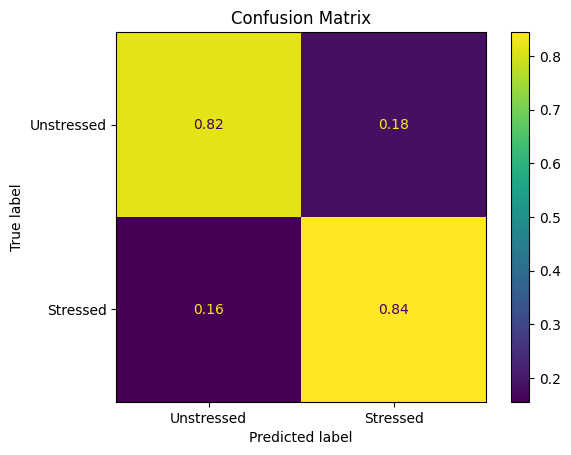

In [124]:
cm = confusion_matrix(Y_test, y_pred, normalize='true')
custom_labels = ['Unstressed', 'Stressed']

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=custom_labels)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

In [125]:
report = classification_report(Y_test, y_pred, target_names=['Class 0', 'Class 1'])
print(report)

              precision    recall  f1-score   support

     Class 0       0.80      0.82      0.81       564
     Class 1       0.86      0.84      0.85       758

    accuracy                           0.83      1322
   macro avg       0.83      0.83      0.83      1322
weighted avg       0.83      0.83      0.83      1322



In [112]:
for name, model in tqdm(models.items()):
    # model.fit(X_train_scaled, Y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy:.2f}")
    print(f"{name}: Precision = {precision:.2f}")
    print(f"{name}: Recall = {recall:.2f}")
    print(f"{name}: f1 = {f1:.2f}")

 22%|██▏       | 2/9 [00:00<00:00, 15.09it/s]

MLPClassifier: Accuracy = 0.65
MLPClassifier: Precision = 0.77
MLPClassifier: Recall = 0.72
MLPClassifier: f1 = 0.75
KNeighborsClassifier: Accuracy = 0.71
KNeighborsClassifier: Precision = 0.77
KNeighborsClassifier: Recall = 0.85
KNeighborsClassifier: f1 = 0.81


 44%|████▍     | 4/9 [00:00<00:00, 10.92it/s]

SVC: Accuracy = 0.71
SVC: Precision = 0.77
SVC: Recall = 0.86
SVC: f1 = 0.81
LogisticRegression: Accuracy = 0.72
LogisticRegression: Precision = 0.77
LogisticRegression: Recall = 0.88
LogisticRegression: f1 = 0.82
DecisionTreeClassifier: Accuracy = 0.64
DecisionTreeClassifier: Precision = 0.75
DecisionTreeClassifier: Recall = 0.76
DecisionTreeClassifier: f1 = 0.76
RandomForestClassifier: Accuracy = 0.68
RandomForestClassifier: Precision = 0.78
RandomForestClassifier: Recall = 0.79
RandomForestClassifier: f1 = 0.78
AdaBoostClassifier: Accuracy = 0.71
AdaBoostClassifier: Precision = 0.76
AdaBoostClassifier: Recall = 0.89
AdaBoostClassifier: f1 = 0.82
GaussianNB: Accuracy = 0.72
GaussianNB: Precision = 0.78
GaussianNB: Recall = 0.85
GaussianNB: f1 = 0.81


100%|██████████| 9/9 [00:00<00:00, 13.87it/s]

Voting: Accuracy = 0.71
Voting: Precision = 0.77
Voting: Recall = 0.86
Voting: f1 = 0.81


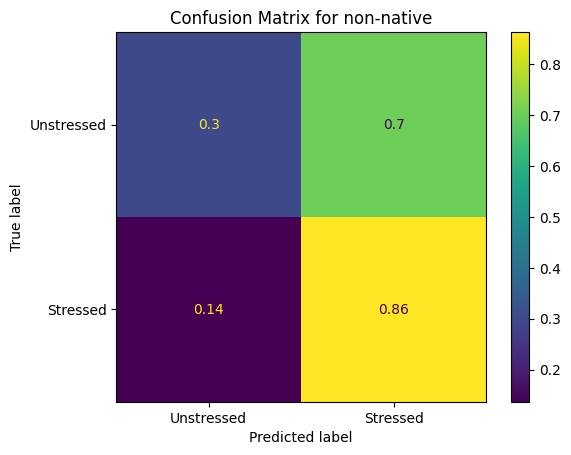

In [117]:
cm = confusion_matrix(Y_test, y_pred, normalize='true')
custom_labels = ['Unstressed', 'Stressed']

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=custom_labels)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix for non-native")
plt.show()

In [116]:
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
print(f"{name}: Accuracy = {accuracy:.2f}")
print(f"{name}: Precision = {precision:.2f}")
print(f"{name}: Recall = {recall:.2f}")
print(f"{name}: f1 = {f1:.2f}")

Voting: Accuracy = 0.71
Voting: Precision = 0.77
Voting: Recall = 0.86
Voting: f1 = 0.81


In [119]:
report = classification_report(Y_test, y_pred, target_names=['Class 0', 'Class 1'])
print(report)

              precision    recall  f1-score   support

     Class 0       0.45      0.30      0.36       436
     Class 1       0.77      0.86      0.81      1168

    accuracy                           0.71      1604
   macro avg       0.61      0.58      0.59      1604
weighted avg       0.68      0.71      0.69      1604

